In [1]:
import sys
import os
import logging

import pandas as pd

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils
from hostelprices.database import Database

%load_ext autoreload
%autoreload 2

In [2]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
#collection_name = "main_coll-dev-12_14_2022-15_07"

DB = Database(
    client_id=client_id, data_base_name=data_base_name#, collection_name=collection_name
    )

In [3]:
df_all = DB.getPandasDf()
df_all

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time
0,639b3a91263daf73fcc83118,3.420000,6.4,1.2,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889
1,639b3a91263daf73fcc8310d,18.781106,9.7,0.2,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889
2,639b3a91263daf73fcc83110,8.220000,8.7,1.1,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889
3,639b3a91263daf73fcc83109,25.354493,9.7,0.3,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889
4,639b3a91263daf73fcc83114,21.598272,9.4,0.3,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889
...,...,...,...,...,...,...,...,...
23,639bafb945ece293533ed3b1,17.842051,8.8,0.3,Lisbon,2023-02-13,2,2022-12-15 23:37:29.241
24,639bafb945ece293533ed3b2,21.598272,9.1,0.5,Lisbon,2023-02-13,2,2022-12-15 23:37:29.241
25,639bafb945ece293533ed3b3,23.476383,8.2,2.2,Lisbon,2023-02-13,2,2022-12-15 23:37:29.241
26,639bafb945ece293533ed3b4,23.476383,8.4,0.1,Lisbon,2023-02-13,2,2022-12-15 23:37:29.241


In [4]:
# coll_names = DB.db.list_collection_names()
# coll_selection = []
# for coll_name in coll_names:
#     if not (('12_15_2022' in coll_name) or ('12_14_2022' in coll_name) or (not '2022' in coll_name) or ('dev' in coll_name)):
#         coll_selection.append(coll_name)

# coll_selection

In [5]:
# DB_list = []
# for coll_name in coll_selection:
#     DB = Database(
#         client_id=client_id, data_base_name=data_base_name, collection_name=coll_name
#         )
#     DB_list.append(DB)
#     df = DB.getPandasDf()
    

In [6]:
# DB_df_list = []
# for DB in DB_list:
#     df = DB.getPandasDf()
#     df["collection"] = DB.collection_name
#     DB_df_list.append(df)

In [7]:
# df_all = pd.concat(DB_df_list)
# df_all

In [8]:
print(df_all.city.value_counts())
print(df_all.date_from.value_counts())
print(df_all["duration (days)"].value_counts())

Lisbon     1487
Seville      82
Name: city, dtype: int64
2023-02-13    1344
2023-01-17     113
2023-01-13     112
Name: date_from, dtype: int64
2    1344
5     120
1     105
Name: duration (days), dtype: int64


In [9]:
df_all["rating_per_price"] = df_all["rating"] / df_all["price (EUR)"]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

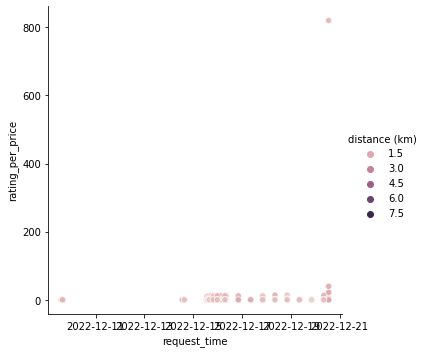

In [11]:
sns.relplot(
    data=df_all,    
    x='request_time',
    y='rating_per_price',
    hue='distance (km)'
    )
plt.show()